In [15]:
import common
from qiskit_aer import Aer
from icecream import ic
from qiskit.quantum_info.analysis import hellinger_fidelity


In [2]:
# Setup simulator backend
#provider = BraketProvider()
target_name = 'aer_simulator' # this is a noise-free simulator
provider = Aer
backend = provider.get_backend(target_name)

In [3]:
# build and transpile the qft circuit
num_qubits8 = 8
#num_qubits10 = 10
#num_qubits12 = 12
circuit1 = common.build_qft_circuit(num_qubits8, backend)
#circuit2 = common.build_qft_circuit(num_qubits10, backend)
#circuit3 = common.build_qft_circuit(num_qubits12, backend)

In [4]:
# Run the simulation
result1 = backend.run(circuit1).result()
#result2 = backend.run(circuit2).result()
#result3 = backend.run(circuit3).result()


In [5]:
def reduceCountPattern(countsIn):
    newcounts = dict()
    for key in countsIn.keys():
        newkey = key.split(" ")[0]
        newcounts[newkey]=countsIn[key]
    return newcounts

In [6]:
counts_8_qubit = reduceCountPattern(result1.get_counts(circuit1))
#ic(counts_8_qubit)

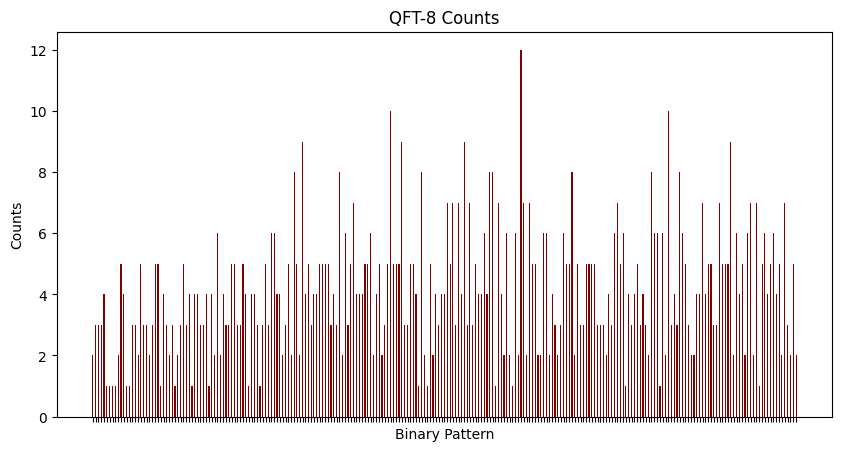

In [7]:
import matplotlib.pyplot as plt 

bitPatterns = list(counts_8_qubit.keys())
counts = list(counts_8_qubit.values())
 
plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(bitPatterns, counts, color ='maroon', width = 0.4)
plt.ylabel(ylabel="Counts")
plt.xlabel(xlabel="Binary Pattern")
plt.tick_params(labelbottom=False)
plt.title("QFT-8 Counts")
plt.show()

In [25]:
# add one to the secret_int to compensate for the extra rotations done between QFT and IQFT
import numpy as np
num_qubits = 28

np.random.seed(0)    
# generate input string based on the number of qubits
secret_int_list = np.random.choice(2**(num_qubits), 1, False)
print(secret_int_list)
secret_int_plus_one = (secret_int_list[0] + 1) % (2 ** num_qubits)

# create the key that is expected to have all the measurements (for this circuit)
key = format(secret_int_plus_one, f"0{num_qubits}b")

# correct distribution is measuring the key 100% of the time
correct_dist = {key: 1.0}

print (correct_dist)

[118016170]
{'0111000010001100100010101011': 1.0}


In [16]:
import os
from azure.quantum import Workspace
from azure.quantum.qiskit import AzureQuantumProvider 

seqcure_id = os.getenv("AZURE_QUANTUM_RESOURCE_ID")
location = os.getenv("AZURE_QUANTUM_LOCATION") 

workspace = Workspace(  
            resource_id = seqcure_id,
            location = location 
        )

provider = AzureQuantumProvider(workspace)
ic(provider.backends())
# backend = provider.get_backend(target_name)

ic| provider.backends(): [<IonQSimulatorBackend('ionq.simulator')>,
                          <IonQAriaBackend('ionq.qpu.aria-1')>,
                          <IonQAriaBackend('ionq.qpu.aria-2')>,
                          <QuantinuumSyntaxCheckerBackend('quantinuum.sim.h1-1sc')>,
                          <QuantinuumEmulatorBackend('quantinuum.sim.h1-1e')>,
                          <QuantinuumQPUBackend('quantinuum.qpu.h1-1')>,
                          <RigettiSimulatorBackend('rigetti.sim.qvm')>,
                          <RigettiQPUBackend('rigetti.qpu.ankaa-2')>,
                          <MicrosoftResourceEstimationBackend('microsoft.estimator')>]


[<IonQSimulatorBackend('ionq.simulator')>,
 <IonQAriaBackend('ionq.qpu.aria-1')>,
 <IonQAriaBackend('ionq.qpu.aria-2')>,
 <QuantinuumSyntaxCheckerBackend('quantinuum.sim.h1-1sc')>,
 <QuantinuumEmulatorBackend('quantinuum.sim.h1-1e')>,
 <QuantinuumQPUBackend('quantinuum.qpu.h1-1')>,
 <RigettiSimulatorBackend('rigetti.sim.qvm')>,
 <RigettiQPUBackend('rigetti.qpu.ankaa-2')>,
 <MicrosoftResourceEstimationBackend('microsoft.estimator')>]